In [1]:
import time,os

import tensorflow as tf
import numpy as np

import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import custom_vgg19
import Lib
import InputPipeline


In [2]:
BATCH_SIZE = 10
input_shape = [BATCH_SIZE, 256, 256, 3]
STYLE_LAYERS = ('conv1_1', 'conv2_1', 'conv3_1', 'conv4_1')
CONTENT_LAYER = 'conv4_2' # I can get good result with relu3_2 with slow neural-style with same weight. maybe I can try here
CONTENT_WEIGHT = 15
STYLE_WEIGHT = 100
NEW_H, NEW_W = 256, 256

['styles//the_scream.jpg'] (1, 1528, 1200, 3)


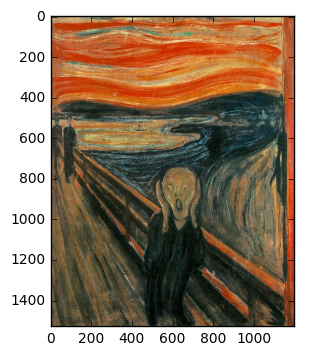

In [9]:
img = Lib.load_image_as_batch_with_optional_resize('styles/the_scream.jpg')
print fname, img.shape
plt.imshow(img[0,...])
plt.show()


In [3]:
img_dir_path = 'styles/'
image_batch_size1, fname_batch_size1, img_filenames = InputPipeline.create_input_pipeline_for_styleimg(img_dir_path, 256, 256)
sess=tf.Session()
sess.run(tf.initialize_all_variables())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

  ----   DEBUG: image scale of InputPipeline will be [0,1], could try [0,255] and substract mean later.
  ----   DEBUG: Inferred image_batch shape:(check if it is fully specified!)[1, 256, 256, 3]


In [19]:
img_dir_path='styles'

tmp = os.listdir(img_dir_path)
img_filenames = filter(lambda s: s.endswith('jpg'), tmp)
img_filenames = [img_dir_path+'/'+name for name in img_filenames]
assert len(tmp) == len(img_filenames), "Sanity check: should be a directory only containing .jpg files, " + \
    "because the image file reader assumes this"

# Makes an input queue
input_queue = tf.train.string_input_producer(img_filenames, num_epochs=None, shuffle=True)

# read images from disk
fname_tensor = input_queue.dequeue()
file_contents = tf.read_file(fname_tensor)
one_image = tf.image.decode_jpeg(file_contents, channels=3)
one_image = tf.image.convert_image_dtype(one_image, tf.float32)

# Batching (input tensors backed by a queue; and then combine inputs into a batch)
image_batch_size1, fname_batch_size1 = tf.train.batch([one_image, fname_tensor], batch_size=1, capacity=10)


ValueError: All shapes must be fully defined: [TensorShape([Dimension(None), Dimension(None), Dimension(3)]), TensorShape([])]

(764, 600, 3)


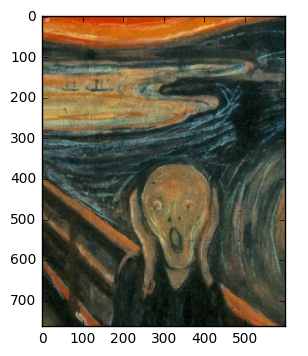

In [15]:

[img,] = sess.run([one_image])
print  img.shape
plt.imshow(img)
plt.show()

['styles//the_scream.jpg'] (1, 256, 256, 3)


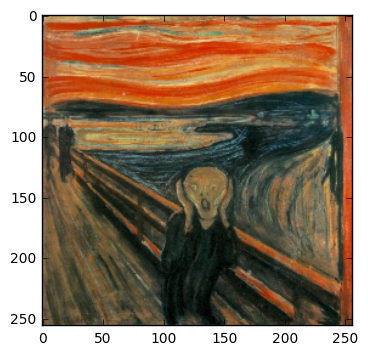

In [8]:

[img, fname] = sess.run([image_batch_size1, fname_batch_size1])
print fname, img.shape
plt.imshow(img[0,...])
plt.show()

In [7]:
content_ph = tf.placeholder(shape=input_shape,dtype=tf.float32)
style_ph = tf.placeholder(shape=input_shape, dtype=tf.float32)
Lib.buildStyconNet(content_ph, style_ph)

conv layer, output size: [10, 256, 256, 32]
conv layer, output size: [10, 128, 128, 64]
conv layer, output size: [10, 64, 64, 128]
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
conv layer, output size: [10, 256, 256, 32]
conv layer, output size: [10, 128, 128, 64]
conv layer, output size: [10, 64, 64, 128]
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 

<tf.Tensor 'styconNet/decoder/div_7:0' shape=(10, 256, 256, 3) dtype=float32>

In [4]:
sess=tf.Session()

In [5]:

for fname in ['chkpts/mosaic.jpg_s100_c15_8000.ckpt', 'chkpts/udnie.jpg_s100_c7_8000.ckpt']:
    scopename = os.path.basename(fname)
    with tf.variable_scope(scopename):
        pred = Lib.buildTransformNet(content_ph,expected_shape=input_shape)
        transNetVars = tf.get_collection(tf.GraphKeys.VARIABLES, scope = scopename)
        chkvarname2var = {v.name.replace(scopename+'/','').replace(':0',''): v for v in transNetVars}
        # if it fails to load, it's probably because the names don't match. then use this file to inspect the checkpoint: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/tools/inspect_checkpoint.py
        saver = tf.train.Saver(chkvarname2var)
        saver.restore(sess, fname)

conv layer, output size: [10, 256, 256, 32]
conv layer, output size: [10, 128, 128, 64]
conv layer, output size: [10, 64, 64, 128]
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 64, 64, 128]
conv layer, output size: [10, 64, 64, 128]
END residual_block
deconv layer, output size: [10, 128, 128, 64]
deconv layer, output size: [10, 256, 256, 32]
conv layer, output size: [10, 256, 256, 3]
conv layer, output size: [10, 256, 256, 32]
conv layer, output size: [10, 128, 128, 64]
conv layer,

In [6]:
[t.name for t in tf.get_collection(tf.GraphKeys.VARIABLES, scope = '')]

[u'styconNet/con/Variable:0',
 u'styconNet/con/instnorm_shift:0',
 u'styconNet/con/instnorm_scale:0',
 u'styconNet/con/Variable_1:0',
 u'styconNet/con/instnorm_shift_1:0',
 u'styconNet/con/instnorm_scale_1:0',
 u'styconNet/con/Variable_2:0',
 u'styconNet/con/instnorm_shift_2:0',
 u'styconNet/con/instnorm_scale_2:0',
 u'styconNet/con/Variable_3:0',
 u'styconNet/con/instnorm_shift_3:0',
 u'styconNet/con/instnorm_scale_3:0',
 u'styconNet/con/Variable_4:0',
 u'styconNet/con/instnorm_shift_4:0',
 u'styconNet/con/instnorm_scale_4:0',
 u'styconNet/con/Variable_5:0',
 u'styconNet/con/instnorm_shift_5:0',
 u'styconNet/con/instnorm_scale_5:0',
 u'styconNet/con/Variable_6:0',
 u'styconNet/con/instnorm_shift_6:0',
 u'styconNet/con/instnorm_scale_6:0',
 u'styconNet/sty/Variable:0',
 u'styconNet/sty/instnorm_shift:0',
 u'styconNet/sty/instnorm_scale:0',
 u'styconNet/sty/Variable_1:0',
 u'styconNet/sty/instnorm_shift_1:0',
 u'styconNet/sty/instnorm_scale_1:0',
 u'styconNet/sty/Variable_2:0',
 u'styco